<a href="https://colab.research.google.com/github/ChoEChoU/AI_Final/blob/hht/recall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Reshape,Activation
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
from keras.layers import Dropout
import os
import numpy as np 
import pandas as pd
import cv2
from keras.callbacks import EarlyStopping 

In [ ]:
impath = "/content/drive/MyDrive/AI project/Vegetable Images/train"
class_list=os.listdir(impath) 
print(class_list)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [ ]:
def load_imgs(path):
  imgs=[]
  label=[]
  for class_name in class_list:
      img_list = os.listdir(path + class_name)
      for img_name in img_list:
          temp_img = cv2.imread(path + class_name +"/" + img_name, cv2.COLOR_BGR2RGB)
          if temp_img is None:
              print("이미지 인식 못함")
          else:
              resize_img = cv2.resize(temp_img, (128, 128))
              imgs.append(np.array(resize_img))
              label.append(class_name)
  return np.array(imgs),label

In [ ]:
train_x,train_y=load_imgs('/content/drive/MyDrive/AI project/Vegetable Images/train/')
train_y=pd.Series(train_y)
train_x
print(train_x.shape)

(15000, 128, 128, 3)


In [ ]:
valid_x,valid_y=load_imgs('/content/drive/MyDrive/AI project/Vegetable Images/validation/')
valid_y=pd.Series(valid_y)
valid_x
print(valid_x.shape)

(3000, 128, 128, 3)


In [ ]:
test_x,test_y=load_imgs('/content/drive/MyDrive/AI project/Vegetable Images/test/')
test_y=pd.Series(test_y)
test_x
print(test_x.shape)

(3000, 128, 128, 3)


In [ ]:
name_list = ["Bean", "Bitter_Gourd", "Bottle_Gourd", "Brinjal", "Broccoli","Cabbage","Capsicum","Carrot","Cauliflower","Cucumber","Papaya","Potato","Pumpkin","Radish","Tomato"]
index = 0
for i in name_list:
  test_y=test_y.replace(i,index)
  valid_y=valid_y.replace(i,index)
  train_y=train_y.replace(i,index)
  index += 1  

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential 
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=train_x.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(15,activation='softmax'),
])
model.summary()
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model.fit(train_x,train_y,epochs=50,  validation_data=(valid_x, valid_y), callbacks = [early_stopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)     

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.696933,0.635800,0.700579,0.790000
1,0.385339,0.880667,0.526721,0.847000
2,0.208093,0.936333,0.350974,0.898667
3,0.214629,0.935667,0.595492,0.854667
4,0.111214,0.966800,0.564737,0.880000
5,0.144057,0.958933,0.624296,0.865667
6,0.099304,0.973067,0.466796,0.892000
7,0.147114,0.960933,0.472361,0.900667


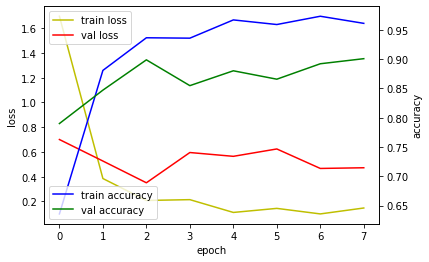

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [ ]:
acc = model.evaluate(train_x,train_y)
print(acc)

469/469 [==============================] - 5s 10ms/step - loss: 0.0637 - accuracy: 0.9808
[0.06367169320583344, 0.9807999730110168]


In [ ]:
y_pred=model.predict(test_x)
len(y_pred)

94/94 [==============================] - 1s 7ms/step


3000

In [ ]:
def acc(_test, _y):
    Tp = 0
    Negative = 0
    cnt = 0
    for num in _test:
        if np.argmax(num)==_y[cnt]:
            Tp+=1
        else:
            Negative += 1
        cnt += 1
    print("맞춘 갯수 : ", Tp)
    print("틀린 갯수 : ", Negative)
    print("정확도 : ", Tp/(Tp+Negative)*100, "%")

In [ ]:
acc(y_pred, test_y)

맞춘 갯수 :  2710
틀린 갯수 :  290
정확도 :  90.33333333333333 %


In [ ]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred, axis=-1)

accuracy_score(test_y,y_pred)

94/94 [==============================] - 1s 7ms/step


0.9033333333333333

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
classification_report(test_y, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.88       200\n           1       0.75      0.94      0.83       200\n           2       0.98      0.97      0.97       200\n           3       0.89      0.83      0.86       200\n           4       0.90      0.90      0.90       200\n           5       0.80      0.85      0.82       200\n           6       0.98      0.96      0.97       200\n           7       0.98      0.98      0.98       200\n           8       0.83      0.84      0.84       200\n           9       0.96      0.81      0.88       200\n          10       0.98      0.94      0.96       200\n          11       0.95      0.97      0.96       200\n          12       0.87      0.87      0.87       200\n          13       0.97      0.94      0.95       200\n          14       0.94      0.83      0.88       200\n\n    accuracy                           0.90      3000\n   macro avg       0.91      0.90      0.90      3000\nweigh

In [ ]:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       200
           1       0.75      0.94      0.83       200
           2       0.98      0.97      0.97       200
           3       0.89      0.83      0.86       200
           4       0.90      0.90      0.90       200
           5       0.80      0.85      0.82       200
           6       0.98      0.96      0.97       200
           7       0.98      0.98      0.98       200
           8       0.83      0.84      0.84       200
           9       0.96      0.81      0.88       200
          10       0.98      0.94      0.96       200
          11       0.95      0.97      0.96       200
          12       0.87      0.87      0.87       200
          13       0.97      0.94      0.95       200
          14       0.94      0.83      0.88       200

    accuracy                           0.90      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.91      0.90      0.90      3000


In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

94/94 [==============================] - 1s 7ms/step
[ 0  0  1 ...  1 14 14]


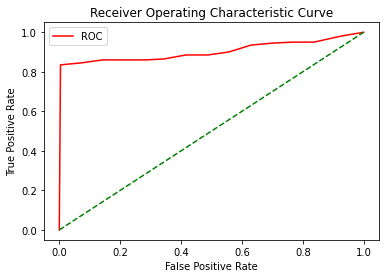

In [ ]:
from sklearn.metrics import roc_curve


y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred, axis=-1)
print(y_pred)
fper, tper, thresholds = roc_curve(test_y, y_pred, pos_label=14)
plot_roc_curve(fper, tper)

In [ ]:
classes = list(test_x)
real_classes = [classes[x] for x in test_y]

pred = tf.argmax(model.predict(test_x),axis=1)
pred_classes = [classes[x] for x in pred]

94/94 [==============================] - 1s 7ms/step


Text(114.0, 0.5, 'Predict')

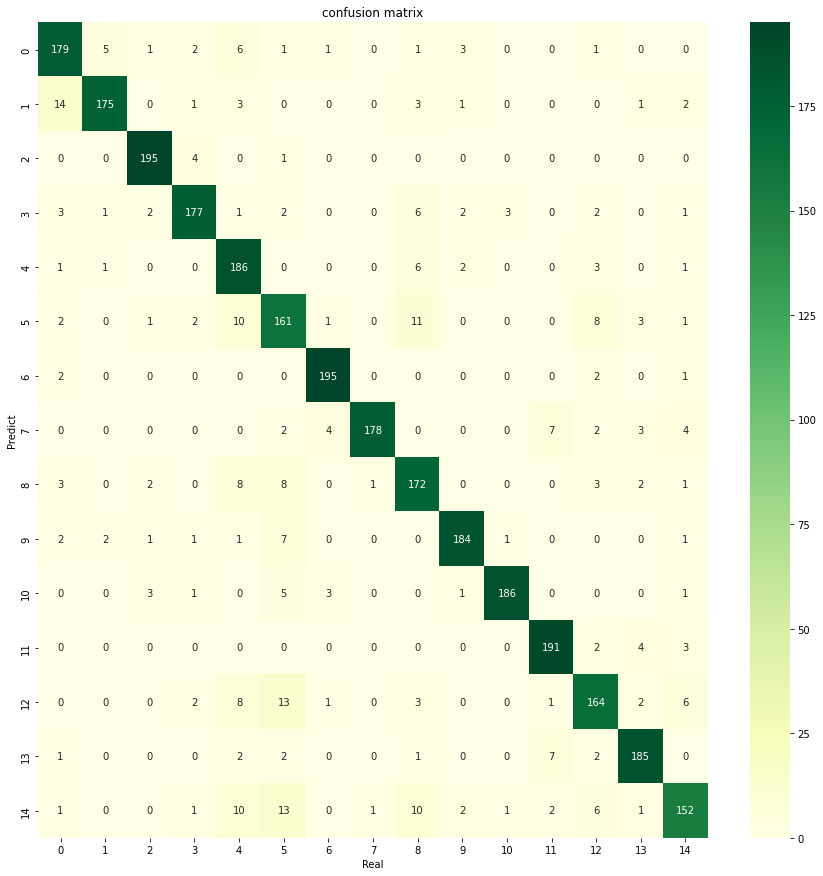

In [ ]:
import seaborn as sns

m = pd.DataFrame(prediction, index = [i for i in range(len(prediction[0]))], columns = [i for i in range(len(prediction[0]))])
plt.figure(figsize=(15,15))
plt.title("confusion matrix")
con_matric = sns.heatmap(m,annot=True,fmt='d',cmap="YlGn")
con_matric.set_xlabel("Real")
con_matric.set_ylabel("Predict")